## Project Overview - Sentiment Analysis 

This project focuses on developing a machine learning model for sentiment analysis of cryptocurrency news, tailored to provide insights for a simple trading bot. The model aims to classify news texts into basic sentiment categories and quantify the strength of these sentiments. The key features and considerations of this project are outlined below:

### Basic Sentiment Classification
- **Objective**: Classify the sentiment of cryptocurrency news articles into 'positive,' 'neutral,' and 'negative.'
- **Importance**: This forms the foundation of our sentiment analysis, crucial for understanding market sentiment and guiding trading decisions.

### Sentiment Intensity Scoring
- **Objective**: Provide a sentiment intensity score to measure how strongly an article expresses a particular sentiment.
- **Relevance to Trading**: This score helps gauge the potential impact of news on cryptocurrency market movements, offering a nuanced view beyond basic categorization.

### Focus on Simplicity and Efficiency
- **Project Context**: As a final portfolio project for Codecademy's Machine Learning course, the aim is to create a model that aligns with the educational goals of the course, emphasizing simplicity and practicality.
- **Integration with Trading Bot**: The model is designed with the potential to integrate with a simple trading bot. 
- **Future Expansion**: While the current scope is kept manageable for educational purposes, the project lays the groundwork for future enhancements and more complex features.

# Sentiment Analysis of Cryptocurrency News Articles
## Introduction

This Jupyter Notebook is focused on the sentiment analysis of cryptocurrency news articles. The objective is to investigate how news content relates to the sentiment and potential market movements in the cryptocurrency domain. Through this analysis, we aim to understand the influence of news articles on cryptocurrency market sentiments and trends.

The dataset, "SahandNZ/cryptonews-articles-with-price-momentum-labels", consists of news articles sourced from Cryptonews.com and Binance.com. It includes the articles' text, publication dates, source URLs, and sentiment labels, providing a comprehensive view of the news impact on cryptocurrency market dynamics.

In the following sections, we will engage in data loading, preprocessing, exploratory data analysis, and building a machine learning model. The goal is to develop a robust model that can accurately interpret and classify the sentiment of each news article and draw meaningful insights about its potential impact on the cryptocurrency market.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Loading the Dataset
This cell loads the dataset 'SahandNZ/cryptonews-articles-with-price-momentum-labels' using the Hugging Face 'datasets' library.


In [2]:
dataset = load_dataset("SahandNZ/cryptonews-articles-with-price-momentum-labels")




### Preparation of Datasets for Machine Learning Workflow

In this project, we have three distinct datasets, each serving a specific purpose in the machine learning workflow:

- **Train Set (`train.csv`)**:
- **Date Range**: October 14, 2022, to March 1, 2023.
- Utilized for training the model, it contains historical data up to the beginning of March 2023.

- **Validation Set (`validation.csv`)**:
- **Date Range**: March 1, 2023, to March 22, 2023.
- Used for validating the model's performance during the tuning phase, it picks up immediately after the training set.

- **Test Set (`test.csv`)**:
- **Date Range**: March 22, 2023, to May 31, 2023.
- Reserved for the final evaluation of the trained model, it covers the period following the validation set.

#### Concatenating Training and Validation Sets

For the initial stages of model development, including feature engineering and Exploratory Data Analysis, we combine the training and validation datasets, this is achieved using the `concatenate_datasets` function from the Hugging Face `datasets` library:


In [3]:
from datasets import concatenate_datasets

# Concatenate only the train and validation data
combined_dataset = concatenate_datasets([dataset['train'], dataset['validation']])



# Displaying Basic Information About the Combined Dataset

This cell displays basic information about the combined dataset. It prints the column names, the total number of entries in the dataset, and an example entry. This information is crucial for understanding the structure of our dataset, including the types of data it contains and a sample of what the data entries look like.


In [4]:
print("Column names:", combined_dataset.column_names)
print("Number of entries:", len(combined_dataset))
print("Example entry:", combined_dataset[0])


Column names: ['datetime', 'text', 'url', 'label']
Number of entries: 162310
Example entry: {'datetime': '2022-10-14', 'text': 'despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high', 'url': 'https://cryptonews.com/news/bitcoin-price-and-ethereum-why-could-btc-go-after-20500.htm', 'label': 1}


# Output of Dataset Structure

The output from the previous cell shows the structure of our combined dataset. It confirms the column names ('datetime', 'text', 'url', 'label'), the total number of entries in the dataset, and provides an example entry. This example gives us a glimpse into the actual data we will be analyzing, including a date, a summarized text of a news article, its source URL, and a label that might indicate the sentiment or impact of the news article.


# Date Validation Function Definition

In this cell, we define the function `validate_date`. This function is responsible for converting strings into datetime objects. It uses the Pandas library's `to_datetime` method with error handling. If the string cannot be converted into a datetime object (due to format issues or other anomalies), the function will return `None`. This ensures that all date entries in our dataset are in a consistent format, which is crucial for any time-based analysis we might perform later on.


In [5]:
import pandas as pd

def validate_date(date_str):
    """
    Attempt to convert a string to a datetime object.
    Returns None if the conversion fails.
    """
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')
    except ValueError:
        return None


## Converting the Dataset to a DataFrame and Applying Date Validation
This cell converts the combined dataset to a Pandas DataFrame and applies the validate_date function to the 'datetime' column. It ensures that all dates are in a consistent and proper datetime format, suitable for time-based analysis.


In [6]:
# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame({column: combined_dataset[column] for column in combined_dataset.column_names})

# Apply the validate_date function to the 'datetime' column
df['ValidDate'] = df['datetime'].apply(validate_date)

# Extract just the date part and store it in a new column
df['DateOnly'] = df['ValidDate'].dt.date


# Checking Text Format Consistency

Before proceeding with further text preprocessing, it's important to check the consistency and quality of the articles in our dataset. In this section, we will sample a few random articles to visually inspect their format. This step is essential to identify any anomalies or variations in the text data that might require additional preprocessing.


In [7]:
import random

# Set a seed for reproducibility
random.seed(0)

# Sample 5 random articles from the 'text' column in the dataset
random_articles = random.sample(list(df['text']), 5)

# Display the sampled articles
print("Randomly sampled articles:")
for i, article in enumerate(random_articles, 1):
    print(f"Article {i}:")
    print(article)
    print("-----------------------------------------------------\n")


Randomly sampled articles:
Article 1:
perhaps time prolonged bull market could see bitcoin peak 1000 recent trough close 15500 anyone would complaining 1000 rally recent lows implies bitcoin nearing 175000 2025
-----------------------------------------------------

Article 2:
according mark lamb ceo coinflex ver owed exchange 47m stablecoin usdc ceo said exchange written contract ver obligating personally guarantee negative equity coinflex account top margin regularly
-----------------------------------------------------

Article 3:
dash 2 trade includes notification service alerts investors new coin listings centralized exchanges providing information previously available elite investors surprise d2t presale numbers phenomenal much potential
-----------------------------------------------------

Article 4:
hayes clarifies position stating btc reserve asset crypto pristine asset liquid centralized lending companies cels frequently call loans selling experiencing financial difficulties


The articles contain a mix of simple and complex vocabulary, technical terms, and potentially domain-specific jargon, indicating a varied level of content complexity.

# Text Data Preprocessing

## Current State of Data
Upon careful review, we have observed that the dataset has already undergone substantial preprocessing. The text data is not only in a summarized format but also appears to be clean and uniformly structured. This initial preprocessing likely includes essential steps like tokenization, normalization, and stopword removal, making the dataset well-prepared for our analysis.

## Preprocessing Conclusion
Given the prepared state of the dataset, we find no necessity for additional preprocessing steps such as further tokenization, normalization, or stopword removal. The data is already in an optimal format for sentiment analysis. 

With the preprocessing phase adequately addressed, we will next embark on Exploratory Data Analysis (EDA). This critical phase will enable us to delve deeper into the dataset, uncovering patterns, trends, and insights that are pivotal for the forthcoming stages of model development and analysis.


# Exploratory Data Analysis (EDA)

In this section, we will dive into Exploratory Data Analysis to gain deeper insights into our dataset. EDA will help us understand the underlying structure and characteristics of the data, which is crucial for informed model building and analysis.

## Key Focus Areas for EDA:

- **Sentiment Distribution:** Understanding how sentiments are distributed across the dataset.
- **Article Length Analysis:** Examining the length of the news articles.
- **Common Words and Phrases:** Identifying frequent words and phrases to discern prevalent topics and themes in the cryptocurrency news domain.
- **Temporal Trends:** Analyzing how the volume and sentiment of articles vary over time.

These insights will not only aid in building a more effective sentiment analysis model but also provide context for interpreting the model's results.


## Sentiment Distribution
Analyzing the sentiment distribution is crucial to understand the balance or skewness in sentiments across the dataset. This insight can inform how we might handle imbalanced data during model training.


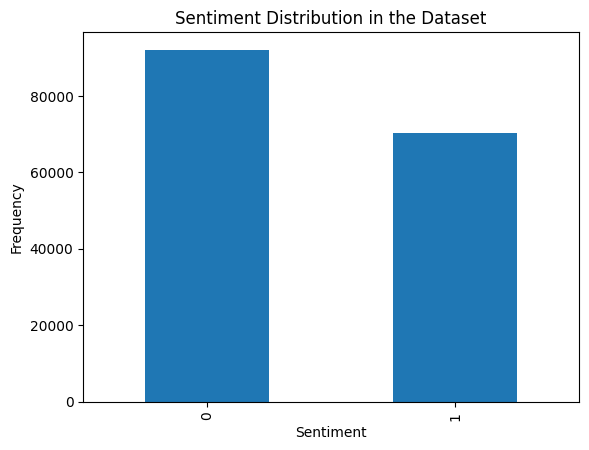

In [8]:
df['label'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


## Analysis of Sentiment

The bar chart above presents the distribution of sentiments within cryptocurrency-related news articles, based on our training and validation datasets. Each bar corresponds to a sentiment class, with the frequency of articles in each class displayed.

### Key Observations:

- **Class Imbalance**: There is a noticeable difference in the frequency of articles between the two sentiment classes. The class labeled "0" has a higher occurrence compared to the class labeled "1", suggesting a skew towards a negative sentiment within the dataset.

- **Nature of Cryptocurrency News**: The prevalence of negative sentiment might reflect the nature of the news articles collected during this period. It could indicate that the events or developments in the cryptocurrency market at this time were predominantly viewed negatively.

- **Impact on Model Training**: The imbalance between the sentiment classes will be taken into account during the model training process. Techniques such as class weighting, oversampling of the minority class, or undersampling of the majority class may be applied to address this imbalance.

- **Evaluation Metrics**: Due to the class imbalance, accuracy alone will not be a sufficient metric for model evaluation. Balanced metrics such as the F1 score, precision, recall, and the ROC-AUC curve will be utilized to provide a more holistic view of model performance.

### Concluding Remarks:

The sentiment distribution seen here is instrumental in guiding the development and evaluation of our sentiment analysis model. It underscores the importance of considering the distribution of classes within the dataset and adjusting our model training and validation strategies accordingly.

Further exploration into the reasons behind the sentiment distribution, such as correlating with specific market events or news developments, could offer additional insights. By doing so, we aim to build a model that not only accurately predicts sentiment but also reflects the underlying trends and nuances of cryptocurrency news sentiment.


## Article Length Analysis
Investigating the length of news articles can reveal patterns about the verbosity and content density. This analysis might highlight outliers or specific trends in article length.


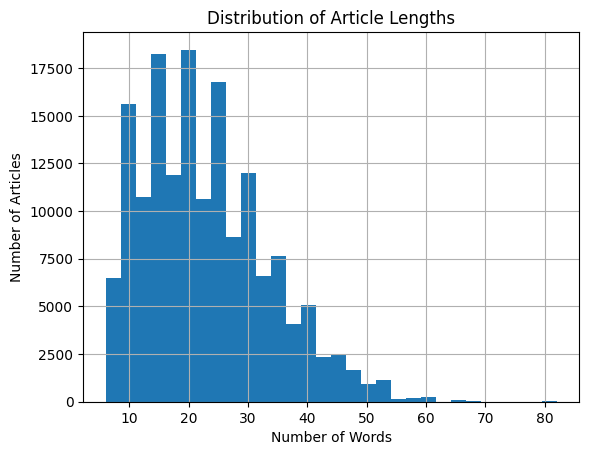

In [9]:
df['article_length'] = df['text'].apply(lambda x: len(x.split()))
df['article_length'].hist(bins=30)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.show()


## Analysis of Article Lengths

The histogram above illustrates the distribution of article lengths across the combined training and validation datasets. Each bin represents the count of articles corresponding to a specific length measured by the number of words.

### Key Observations:

- **Common Article Lengths**: The distribution shows that a majority of the articles fall within a certain range of word counts. Specifically, there is a noticeable concentration of articles with word counts in the lower end of the spectrum.

- **Right-Skewed Distribution**: The distribution is right-skewed, indicating that while most articles are shorter, there is a long tail of articles that are much longer. This skewness points to the presence of detailed reports or analyses among a sea of shorter articles.

- **Implications for Sentiment Analysis**: This varied length distribution suggests that the sentiment conveyed in articles does not depend on their length. Shorter articles can be just as informative and sentiment-laden as longer ones. Therefore, our sentiment analysis model must be adept at extracting sentiment from texts of all lengths.

- **Preprocessing Considerations**: Given the range of article lengths, our text preprocessing strategy must be carefully devised. We want to retain as much informative content as possible, even from shorter articles, without diluting the dataset with overly verbose texts.

- **Feature Engineering**: When engineering features for our model, special attention will be paid to ensure that features capture the sentiment effectively, regardless of article length. This may involve focusing on keyword extraction and contextual understanding rather than relying on word count.

### Concluding Remarks:

The insights gained from the distribution of article lengths will directly influence our approach to building the sentiment analysis model. Recognizing that valuable sentiment can be expressed concisely, we will develop a model and preprocessing pipeline that honor the content's integrity, regardless of length. This analysis reinforces the notion that brevity does not equate to a lack of sentiment or substance in the context of cryptocurrency news articles.


## Common Words and Phrases
Examining common words and phrases can uncover the most frequent topics in the news articles. This helps in understanding the focus areas in the cryptocurrency news domain.


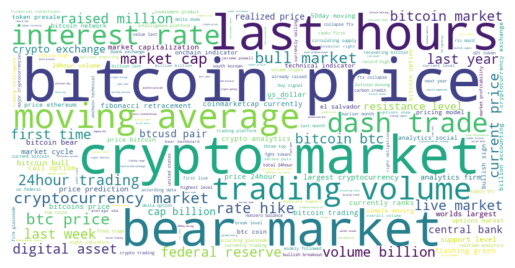

In [10]:
from wordcloud import WordCloud
all_text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word Cloud Analysis 

The word cloud presented here is derived from the cryptocurrency-related news articles in our training and validation datasets. It visually encapsulates the frequency of various terms, highlighting the most dominant topics in the discourse.

### Key Observations:

- **Dominant Market Terms**: Words like "bitcoin," "crypto," and "market" dominate the landscape, indicating a strong focus on the cryptocurrency market itself. Their prominence reflects the centrality of these topics in the articles analyzed.

- **Sentiment Indicators**: The presence of "bull" and "bear" points to discussions surrounding market sentiments. These terms are commonly used to describe upward (bullish) and downward (bearish) market trends, suggesting that the articles frequently address the cyclical nature of market optimism and pessimism.

- **Financial Analysis**: Technical financial terms such as "trading," "volume," and "moving average" suggest that the articles provide in-depth analyses, potentially offering trading insights and forecasting market movements.

- **Economic Factors**: The inclusion of terms like "interest rate" and "federal reserve" implies that the articles also consider broader economic factors and monetary policies and their implications on the cryptocurrency space.

- **Temporal Relevance**: Phrases such as "last hours" and "last week" highlight the currency of the news coverage, indicating that the dataset includes articles that respond to recent events or market changes.

### Concluding Remarks:

This word cloud analysis provides a valuable overview of the thematic content within our dataset. It illustrates the key topics that are most discussed in cryptocurrency news articles, reflecting the issues and trends that are top-of-mind for the market. Understanding these prevalent topics helps in anticipating the areas of focus for our sentiment analysis model and underscores the importance of context in interpreting market-related news. The insights from this visual tool are instrumental in shaping our data preprocessing and feature selection strategies, ensuring that our model captures the essence of the market discourse.


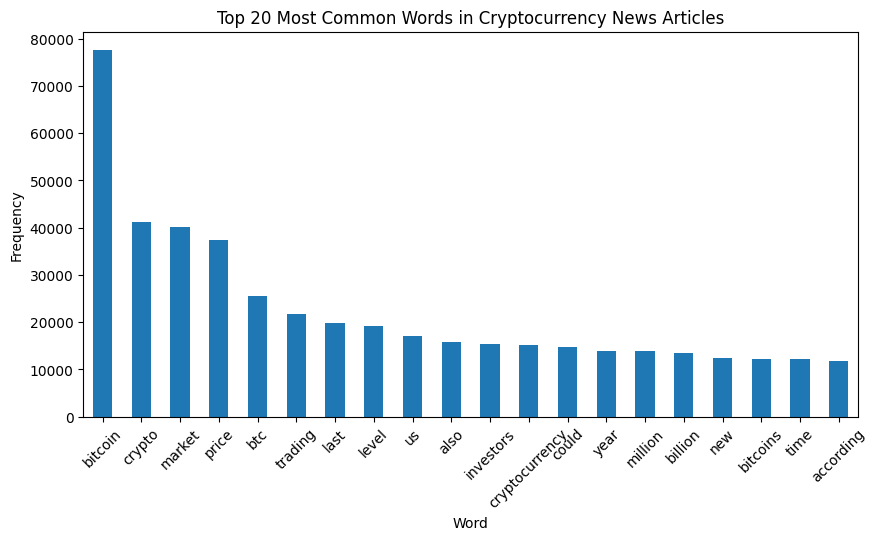

In [11]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Top 20 most common words
all_words = ' '.join(df['text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Split the words and their counts into two lists for plotting
words, counts = zip(*most_common_words)

# Create a pandas DataFrame for easy plotting
df_common_words = pd.DataFrame({'Word': words, 'Frequency': counts})

# Plot the DataFrame
df_common_words.set_index('Word').plot(kind='bar', figsize=(10, 5), legend=False)
plt.title('Top 20 Most Common Words in Cryptocurrency News Articles')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## Analysis of the Top 20 Most Common Words

The bar chart displayed above showcases the frequency of the top 20 most common words within the cryptocurrency news articles from our training and validation sets. This quantitative visualization sheds light on the specific terms that recur most often in the discourse.

### Key Observations:

- **Prevalence of Key Cryptocurrency Terms**: The word "bitcoin" leads in frequency, reflecting its dominance in the cryptocurrency conversation. Accompanying terms such as "crypto," "market," and "price" highlight a strong emphasis on the economic and financial dimensions of the cryptocurrency world.

- **Emphasis on Trading and Finance**: Words like "trading," "btc," along with financial quantifiers "million" and "billion," point towards a narrative rich in trade activities and financial metrics. This aligns with the expected content of articles that delve into market analytics and financial reporting.

- **Contextual Importance of Generic Terms**: While words such as "us," "also," "could," and "new" may initially appear commonplace, they often form part of context-specific phrases that are meaningful within the cryptocurrency discourse. For example, "us" may be part of discussions regarding the U.S. markets or regulations, and "new" often refers to the latest developments in cryptocurrencies or blockchain technology.

- **Significance of Time**: The inclusion of the word "time" implies that the temporal aspect is a significant factor in the articles, an important consideration in the fast-paced and volatile cryptocurrency market context.

### Concluding Remarks:

This common words analysis is instrumental in deciphering the focal points of the discussion within our dataset. It informs our decisions during text preprocessing, helping to distinguish between terms with substantial informational value and those that may be regarded as generic. Furthermore, this analysis lays the groundwork for deeper explorations, such as topic modeling or sentiment analysis, to extract more intricate insights into the narratives surrounding cryptocurrency topics.


## Temporal Trends
Temporal analysis will show how the number of articles and sentiments change over time, which may indicate market reactions to certain events or general trends in the cryptocurrency domain.


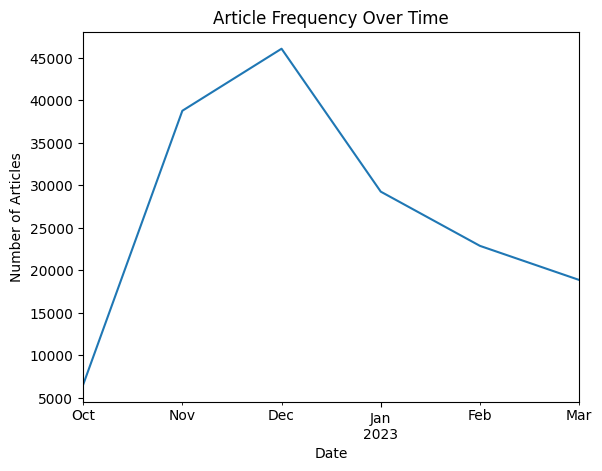

In [12]:
df.set_index('ValidDate')['text'].resample('M').count().plot()
plt.title('Article Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


## Interpretation of Temporal Trends in Article Production

The line chart, "Article Frequency Over Time," depicts the number of cryptocurrency-related news articles published monthly. This visual representation captures the ebb and flow of article production within the training and validation sets timeframe.

### Key Observations:

- **Peak Publishing Activity**: The noticeable peak in December indicates a surge in the publication of articles, which could correspond to key events or developments in the cryptocurrency market during that month.

- **Variable News Production**: The rise and fall in the number of articles over the months reflect the dynamic nature of news production, potentially aligning with the fluctuating interest and activity in the cryptocurrency domain.

- **Downtrend in Article Production**: The chart shows a downtrend in article frequency starting in January, continuing into February, and ending in March. This trend may mirror the natural fluctuation of news cycles or could be influenced by specific events in the cryptocurrency sector during those months.

### Concluding Insights:

The trend line captured in this graph offers a macroscopic view of the cryptocurrency news cycle over the selected months. It provides a foundation for further investigation into the forces that drive media focus on cryptocurrency. By correlating these publishing trends with key market events and price movements, we can gain a deeper understanding of how news coverage relates to and potentially influences the cryptocurrency market.

In summary, this analysis of article frequency over time can help identify critical periods of heightened journalistic activity, which may be indicative of significant events worth exploring in greater detail to comprehend their impact on the cryptocurrency landscape.


## Sentiment Over Time Analysis

In the following analysis, we aim to understand how the sentiment expressed in cryptocurrency-related news articles has evolved over time. We perform a temporal analysis that might reveal patterns, trends, or anomalies in the dataset, potentially corresponding to market movements or key events in the cryptocurrency sector.

### Code Explanation:

1. **Datetime Conversion**:
   We have already ensured, in a previous step, that all entries in the 'datetime' column of our DataFrame are proper datetime objects. This standardization is crucial for accurate time series analysis.

2. **Indexing by Datetime**:
   The 'datetime' column is then set as the index of our DataFrame, allowing us to leverage pandas' powerful time series functionalities.

3. **Monthly Resampling**:
   We resample our data on a monthly basis to count the number of articles associated with each sentiment label for each month. This aggregation gives us a clearer view of the sentiment trends over an extended period.

4. **Value Counts and Stacking**:
   We count the number of occurrences of each sentiment label ('0' for negative, '1' for positive) within these monthly intervals. Using the `unstack` method, we prepare the data for a stacked bar chart, which presents both positive and negative sentiments in a single column for each month, differentiated by color.

5. **Visualization**:
   The resulting DataFrame is plotted as a stacked bar chart, which visually represents the monthly distribution of sentiments. The chart's title, axes labels, and legend are set to make the plot self-explanatory.

By examining the fluctuations in the number of articles with different sentiments over time, we can infer periods of increased optimism or pessimism in the cryptocurrency domain. Such insights could be valuable for understanding the public sentiment's impact on market behavior or for predicting future market trends based on histormore nuanced conclusions.

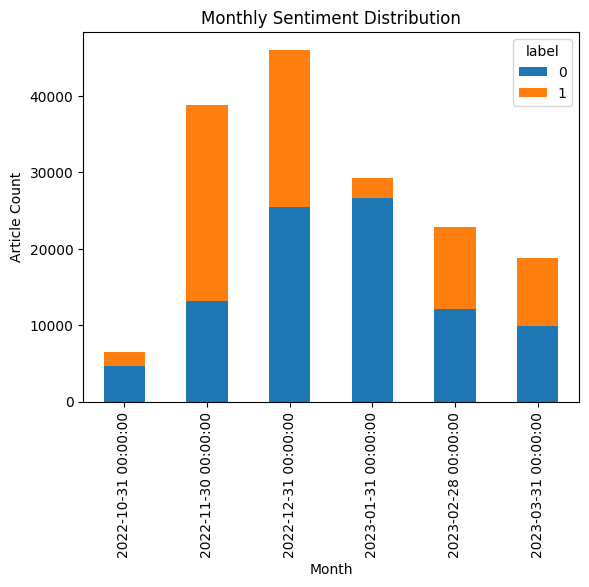

In [13]:
import pandas as pd

# Convert the 'datetime' column to datetime objects and handle errors
# Note: Since you've already validated the dates, you might not need to re-convert them
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop rows with NaT in 'datetime' if any exist after coercion
df = df.dropna(subset=['datetime'])

# Set the 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Verify if the index is a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    raise TypeError("Index is not a DatetimeIndex")

# Group by the index with a monthly frequency and count the occurrences
monthly_sentiment = df.groupby([pd.Grouper(freq='M'), 'label']).size().unstack(fill_value=0)
# Check the actual counts per month

# Plot the results
monthly_sentiment.plot(kind='bar', stacked=True)
plt.title('Monthly Sentiment Distribution')
plt.xlabel('Month')
plt.ylabel('Article Count')
plt.show()

## Monthly Sentiment Distribution Analysis

The "Monthly Sentiment Distribution" graph illustrates the number of cryptocurrency-related news articles categorized by sentiment over time. Each stacked bar represents a month's total articles, segmented into negative (blue) and positive (orange) sentiments.

### Key Observations:

- **Sentiment Fluctuations**: The distribution shows how sentiment in cryptocurrency news varies from month to month. Notably, some months exhibit a higher prevalence of negative sentiment, while others show a more balanced distribution between negative and positive sentiments (0 = negative, 1 = positive).

- **Market Dynamics Reflection**: The varying heights of sentiment categories could reflect underlying market conditions. Periods with a higher count of negative sentiment articles may correspond with market downturns or unfavorable industry events, while more balanced or positive-leaning months could indicate bullish market trends or optimistic industry developments.

- **Interpreting Imbalances**: The presence of both sentiments in each month underlines the diversity of views within the cryptocurrency news space. However, the imbalances observed also suggest that sentiment may be swayed by transient events, which could have implications for market sentiment and investor behavior.

### Concluding Insights:

This sentiment distribution provides a valuable perspective on the emotional tone conveyed by the news media over the analyzed period. It reveals the pulse of the cryptocurrency market as captured by journalists and can serve as an indicator of the market's sentiment trajectory.

By understanding these patterns, we gain insights into the potential impact of news on market sentiment and investor decisions. This analysis is crucial for building a sentiment analysis model that accurately interprets the nuances of market sentiment and for investors seeking to understand the sentiment trends that may influence market dynamics.

## Summary of EDA for Cryptocurrency News Sentiment

Through our exploratory data analysis, we've uncovered several intriguing patterns and correlations in the cryptocurrency news dataset that offer insights into the dynamics of market sentiment as reflected in media coverage.

**Correlation Between Article Frequency and Sentiment**:
When comparing the "Article Frequency Over Time" and "Monthly Sentiment Distribution" plots, one might look for months where an increase in the number of articles correlates with a shift in sentiment. For example, if a peak in article volume aligns with a peak in positive sentiment, this could indicate that a particularly favorable event occurred, driving both increased coverage and a positive outlook.

**Impact of Article Length on Sentiment**:
By examining both the "Distribution of Article Lengths" and "Sentiment Distribution" plots, it's possible to speculate whether shorter or longer articles tend to be more positive or negative. For instance, if shorter articles dominate and there's a prevalence of negative sentiment, one could hypothesize that brief updates may be focused on immediate, potentially negative market reactions.

**Common Words as Sentiment Indicators**:
The "Top 20 Most Common Words" plot alongside the "Monthly Sentiment Distribution" may reveal that certain terms are more prevalent in months with a particular sentiment bias. Words like "bull" may appear more in months with positive sentiment, while "bear" may be more common in negative months.

**Word Frequency and Article Volume**:
The "Top 20 Most Common Words" plot can be juxtaposed with the "Article Frequency Over Time" plot to see if increases in article volume correspond to increased mentions of certain key terms. For instance, an increase in the use of the word "price" during a peak in article volume might indicate a period of significant price volatility.

**Sentiment Consistency Across Time**:
The general sentiment trend, seen in the "Sentiment Distribution in the Dataset" plot, could be compared with temporal trends to see if the sentiment is consistent over time or if it changes with the frequency of article publication. A consistently negative sentiment over months with varying article volumes could suggest underlying pessimism in the market.


We have now concluded the Exploratory Data Analysis (EDA) on the combined training and validation datasets. This phase has provided us with valuable insights into the distribution of sentiments, the frequency of articles over time, the distribution of article lengths, and the commonality of specific words within our corpus of cryptocurrency-related news article
The insights garnered from the EDA will guide us as we move forward with developing our machine learning pipeline. In the subsequent stages of model building and validation, we will revisit EDA to ensure that our model is robust and that our findings remain consistent across different data splits. This iterative approach to EDA is a cornerstone of a rigorous machine learning workflow, ensuring that our final model is both accurate and reliable.

## Feature Engineering on Combined Dataset

In this phase, we apply feature engineering to the combined dataset, which includes both training and validation sets. Our goal is to enhance the dataset's ability to accurately represent the sentiments in cryptocurrency news articles. Below are the steps we will follow:

### 1. Text Preprocessing and Feature Extraction
- **Tokenization**: We start by breaking down the articles into individual words or tokens. This step might already be done, but we will ensure consistency across our dataset. 
- **TF-IDF Vectorization**: This technique is used to transform our text data into a numerical format, highlighting the relative importance of words in the dataset.
- **Word Embeddings**: To capture deeper semantic meanings, we will employ pre-trained embeddings like Word2Vec or GloVe.
- **Sentiment-Specific Keywords**: Identifying and extracting words associated with positive, neutral, and negative sentiments will enhance our analysis.
- **N-grams Analysis**: We will use bi-grams or tri-grams to better understand the context of sentiments expressed in the articles.
- **Polarity Scores**: Tools like TextBlob or VADER will be utilized to obtain sentiment intensity scores for each article.

### 2. DateTime Feature Engineering
- **Date Components**: We will extract day, month, and year from the datetime column to investigate if sentiments have temporal patterns.

### 3. URL Feature Engineering
- **Domain Extraction**: Parsing the domain from the URL will help us identify potential biases based on the news source.

### 4. Feature Scaling and Transformation (If Necessary)
- We will apply feature scaling to our dataset, especially if we use models sensitive to data scale.

_Note_: As we have a designated test set covering the period from March 22, 2023, to May 31, 2023, we do not need to split the combined dataset further. This combined dataset will be utilized for model training and tuning, while the separate test set will be reserved for the final model evaluation.


## Importing Libraries

In this initial step, we import a range of essential libraries that will be used throughout the project. These libraries provide us with the necessary tools for text processing, feature extraction, sentiment analysis, data manipulation, and visualization:

In [14]:
# For text processing and feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize

# Additional libraries for sentiment analysis and other NLP tasks
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # For polarity scores
from nltk.corpus import stopwords  # For stopwords removal
from nltk.stem import WordNetLemmatizer  # For lemmatization

# General data manipulation and visualization libraries (already imported)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that NLTK components are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Tokenization of Text Data

In this step, we perform tokenization on the text data in our dataset. Tokenization is a fundamental process in natural language processing (NLP) where we convert a string of text into individual words or tokens. This process is essential for preparing the text for further analysis and feature extraction.

### Defining the Tokenization Function

We define a function `tokenize_articles`, which takes an article as input and returns a list of tokens. This function utilizes `word_tokenize` from the NLTK library to split the text into words.

### Applying Tokenization to the Dataset

The `tokenize_articles` function is applied to each article in the 'text' column of our DataFrame `df`. The result is stored in a new column `tokenized_text`, which contains the tokenized version of each article.

### Verifying the Tokenization

To ensure that our tokenization process is working correctly, we print the original text and its tokenized version for the first article in the dataset. This comparison allows us to visually confirm the effectiveness of the tokenization.



In [15]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Function for Tokenization
def tokenize_articles(article):
    return word_tokenize(article)

# Apply Tokenization to each article in the 'text' column
df['tokenized_text'] = df['text'].apply(tokenize_articles)

# Display a sample to verify tokenization
print("Original Text Sample:", df['text'].iloc[0])
print("Tokenized Text Sample:", df['tokenized_text'].iloc[0])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original Text Sample: despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high
Tokenized Text Sample: ['despite', 'fact', 'blockchainbased', 'carbon', 'credit', 'marketplace', 'held', 'auction', 'bear', 'market', 'cryptocurrency', 'demand', 'marketplace', 'token', 'remained', 'high']


The comparison between the original and tokenized text confirms that the tokenization process is functioning as intended, successfully preparing the text for further NLP analysis.


## TF-IDF Vectorization

After tokenizing the text data, we now move to transform it into a numerical format using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This method is crucial in text analysis as it reflects how important a word is in a document relative to a corpus.

### Initializing the TF-IDF Vectorizer

The `TfidfVectorizer` from scikit-learn is used for this purpose. We initialize it with a specified number of maximum features. In this case, we set `max_features` to 5000, but this can be adjusted based on the dataset's characteristics and the specific needs of the analysis.

### Applying TF-IDF Vectorization

The vectorizer is applied to the 'text' column of our DataFrame. It's important to note that we use the original, untokenized text for this step. TF-IDF vectorization internally handles its own tokenization and normalization processes.

### Converting TF-IDF Features to DataFrame

For better visualization and understanding, the TF-IDF features are converted into a DataFrame. This step is optional but can be particularly useful during exploratory data analysis to understand the feature space and the weight of different terms.

### Displaying the Results

We display the shape of the TF-IDF feature matrix and the first few rows of the resulting DataFrame. This provides insights into the structure of the data after vectorization and confirms the successful application of this method.

The TF-IDF features are now ready to be used in subsequent modeling and analysis tasks. They provide a rich and nuanced representation of the text data, emphasizing the importance of specific words in the context of the overall dataset.


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the number of features as needed

# Apply TF-IDF Vectorization to the 'text' column of the DataFrame
# Note: We use the original text data, not the tokenized version, as TF-IDF handles its own tokenization
tfidf_features = tfidf_vectorizer.fit_transform(df['text'])

# Optional: Convert the TF-IDF features to a DataFrame for better visualization and understanding
import pandas as pd
tfidf_features_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF features and the first few rows of the DataFrame
print("Shape of TF-IDF Features:", tfidf_features.shape)
print(tfidf_features_df.head())


Shape of TF-IDF Features: (162310, 5000)
   0007  0013  0020  0023  0025  003  005  00513  00533  0055  ...  youre  \
0   0.0   0.0   0.0   0.0   0.0  0.0  0.0    0.0    0.0   0.0  ...    0.0   
1   0.0   0.0   0.0   0.0   0.0  0.0  0.0    0.0    0.0   0.0  ...    0.0   
2   0.0   0.0   0.0   0.0   0.0  0.0  0.0    0.0    0.0   0.0  ...    0.0   
3   0.0   0.0   0.0   0.0   0.0  0.0  0.0    0.0    0.0   0.0  ...    0.0   
4   0.0   0.0   0.0   0.0   0.0  0.0  0.0    0.0    0.0   0.0  ...    0.0   

   youssef  yoy  ytd  yugioh  yusko  zero  zhao  zone  zscore  
0      0.0  0.0  0.0     0.0    0.0   0.0   0.0   0.0     0.0  
1      0.0  0.0  0.0     0.0    0.0   0.0   0.0   0.0     0.0  
2      0.0  0.0  0.0     0.0    0.0   0.0   0.0   0.0     0.0  
3      0.0  0.0  0.0     0.0    0.0   0.0   0.0   0.0     0.0  
4      0.0  0.0  0.0     0.0    0.0   0.0   0.0   0.0     0.0  

[5 rows x 5000 columns]


## Output Analysis of TF-IDF Vectorization

The TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization process has been successfully applied to our dataset, and the output provides insightful details about the transformed text data:

### Shape of the TF-IDF Feature Matrix

- The output `Shape of TF-IDF Features: (162310, 5000)` indicates that our dataset, comprising 162,310 articles, has been transformed into a matrix with 5,000 features.
- Each feature in this matrix represents a term (word) from the dataset, with the 5,000 features being the most significant words as identified by the TF-IDF algorithm.

### Structure of the TF-IDF DataFrame

- The displayed DataFrame shows the first five entries of our dataset in this new vectorized format.
- Each column in the DataFrame corresponds to one of the 5,000 terms, and each row represents an article.
- The values in the matrix are the TF-IDF scores. These scores reflect the importance of each term in an article relative to its frequency across all articles.
- A value of `0.0` in a cell indicates that the corresponding term is either not present in the article or is not considered significant in the context of the entire dataset.

### Observations on Sparse Nature

- The prevalence of `0.0` values throughout the matrix is noticeable. This sparsity is typical in TF-IDF matrices, as most terms do not occur in most documents.
- Sparse matrices like this are common in natural language processing and signify that our text data covers a wide range of vocabulary, but each document only contains a small subset of it.

### Sample Terms in the Matrix

- The terms (like '0007', '0013', 'youssef', 'yoy', 'zero') shown in the output are a small sample of the features generated by the TF-IDF Vectorizer.
- Some of these terms may appear to be numerical or less contextually relevant. This occurrence is a characteristic of the TF-IDF process, especially when the number of features is limited by the `max_features` parameter.

## Displaying Non-Zero TF-IDF Values and Specific Terms

In this section, we explore the TF-IDF results in more detail:

- **Non-Zero TF-IDF Values**: We display the TF-IDF scores that are greater than zero for the first article. This helps us understand which terms are particularly significant in this specific article.
- **TF-IDF Scores for a Specific Term**: We examine the TF-IDF scores for a term of interest (e.g., 'bitcoin') across different documents. This allows us to gauge the term's relevance and importance throughout the entire dataset.


In [17]:
# Display non-zero TF-IDF values for the first document
non_zero_values = tfidf_features_df.iloc[0][tfidf_features_df.iloc[0] > 0]
print("Non-Zero TF-IDF Values for the First Article:")
print(non_zero_values)

# Display TF-IDF values for a specific term across different documents
term = 'bitcoin'  # Term of interest
if term in tfidf_vectorizer.get_feature_names_out():
    term_index = tfidf_vectorizer.get_feature_names_out().tolist().index(term)
    print(f"\nTF-IDF Values for the term '{term}':")
    print(tfidf_features[:, term_index].toarray())
else:
    print(f"\nTerm '{term}' not found in the feature names.")


Non-Zero TF-IDF Values for the First Article:
auction            0.334339
bear               0.174337
blockchainbased    0.261835
carbon             0.246568
credit             0.253763
cryptocurrency     0.142866
demand             0.203629
despite            0.184501
fact               0.228179
held               0.222120
high               0.191327
market             0.108237
marketplace        0.574883
remained           0.243325
token              0.169522
Name: 0, dtype: float64

TF-IDF Values for the term 'bitcoin':
[[0.        ]
 [0.09677332]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


## Insights from TF-IDF Analysis

### Non-Zero TF-IDF Values for the First Article
The output for the first article reveals several terms with significant TF-IDF scores, indicating their relative importance within the text. Notably, 'marketplace' has the highest score, suggesting it is a prominent topic in the article. Other terms such as 'auction', 'blockchainbased', 'carbon', and 'credit' also have substantial scores, reflecting key concepts discussed in the article. The presence of these terms with non-zero TF-IDF values illustrates the document's focus areas.

### TF-IDF Values for the Term 'bitcoin'
The analysis of 'bitcoin' across the corpus using TF-IDF scores provides a nuanced view of the term's significance. Despite 'bitcoin' being highly frequent as per the raw term frequencies and the word cloud visualization, its TF-IDF scores are relatively low. This does not indicate a lack of prevalence, but rather that 'bitcoin' is a common term across the majority of documents. The TF-IDF metric down-weights terms that appear frequently across many documents, as they are less informative for distinguishing between documents. Hence, while 'bitcoin' is certainly a key term in the domain of cryptocurrency news, its ubiquity throughout the corpus means that its TF-IDF scores may not reflect its overall frequency, but rather its relative importance in distinguishing individual documents.



## Statistical Measures and Visualization of TF-IDF Scores

In this analysis, we conduct a statistical examination and visualization of the TF-IDF scores, which highlights the relevance of particular terms within our collection of documents.

### Average TF-IDF Scores
We compute the average TF-IDF score for each term throughout the entire dataset. This metric reveals the terms with the greatest overall significance, indicating which are most characteristic and important.

### Bar Chart Visualization
A bar chart is employed to clearly depict the TF-IDF scores for the top terms in a specific document. This visualization is selected for its directness and interpretability. The bar chart for a chosen document — in this instance, Document 0 — illustrates the five terms that exhibit the highest TF-IDF scores. Each bar is color-coded and annotated with its precise score, offering an at-a-glance understanding of each term's relative importance within that document.


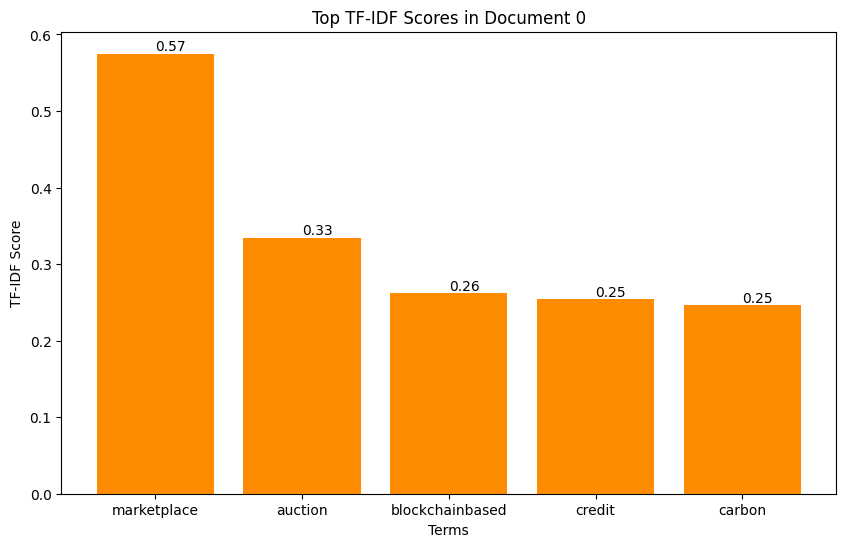

In [18]:
import matplotlib.pyplot as plt

# Select top 5 terms for a specific document
doc_id = 0  # Article we want to analyze
top_terms = tfidf_features_df.iloc[doc_id].sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))  # Larger figure size for better visibility
bars = plt.bar(top_terms.index, top_terms.values, color='darkorange')  # Use a more contrasting color

# Adding annotations on top of each bar if required
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # Annotate the height of the bar

plt.title(f"Top TF-IDF Scores in Document {doc_id}")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.show()

The bar chart of TF-IDF scores for Document 0 provides a clear visualization of term importance, with 'marketplace' standing out as the most significant term. Terms such as 'auction', 'blockchainbased', 'credit', and 'carbon' also feature prominently, indicating key areas of focus within the document. The disparity in scores suggests a varied emphasis on different aspects of the content, with 'marketplace' potentially being a central theme.

## Transition from TF-IDF to Word Embeddings (Word2Vec)

Having completed our analysis with TF-IDF vectorization, we now transition to exploring Word Embeddings, specifically using Word2Vec. This step is a progression in our feature extraction process, aiming to capture deeper semantic meanings in our text data that TF-IDF might not fully encompass.

### Why Word2Vec?
While TF-IDF has been instrumental in highlighting the relative importance of words in our dataset, Word2Vec provides a different approach by generating dense word vectors. This technique is particularly effective in capturing the context of words, their relationships, and subtleties in meaning that are often crucial in sentiment analysis. By converting words into these dense vectors, we can potentially uncover more nuanced patterns and insights in our cryptocurrency-related articles.

### Implementation Plan
1. **Word2Vec Training**: We will train a Word2Vec model on our combined dataset (training and validation sets). This model will learn word associations directly from our text, offering us vectors that are tailored to the specific language and terminology of the cryptocurrency domain.
2. **Vectorizing Text**: Post-training, we will use the Word2Vec model to transform our text data into word vectors. These vectors will then be used to create features for each document, effectively capturing the essence of the text in a form suitable for machine learning algorithms.
3. **Integration with ML Workflow**: The word embeddings generated by Word2Vec will be integrated into our existing machine learning workflow. This integration will involve using these embeddings as input features for our models, alongside or in place of our TF-IDF features, depending on the comparative analysis results.

By incorporating Word2Vec, we anticipate gaining a more profound understanding of the sentiments and themes present in our dataset, which could lead to more accurate and insightful sentiment analysis results.

In [19]:
from gensim.models import Word2Vec
import multiprocessing

# Prepare data for Word2Vec training
tokenized_text = df['tokenized_text'].tolist()

# Word2Vec model parameters
vector_size = 100
window = 5
min_count = 2
workers = multiprocessing.cpu_count()

# Train the Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

# Summarize the model
print("Word2Vec model details:")
print(w2v_model)

# Save the model
w2v_model.save("crypto_word2vec.model")

# Inspect a word vector (example: 'bitcoin')
print("\nExample word vector ('bitcoin'):")
print(w2v_model.wv['bitcoin'])


Word2Vec model details:
Word2Vec<vocab=12863, vector_size=100, alpha=0.025>

Example word vector ('bitcoin'):
[-1.7874541  -0.65664047 -0.7722485   1.4713216  -0.22596523  0.1433461
  0.37249187  0.00679133 -0.06763924 -0.7357943   0.4324818  -0.00725332
 -2.0678265   1.9734573  -2.0061953   1.7863822   2.3842916   1.2558519
  0.646778    0.37045273 -1.5690956  -0.86984193 -0.961983   -0.18724802
 -0.18998933 -1.4938589   3.4973853   0.07651333  1.4901587   0.8353645
 -1.4119117   0.40588266 -0.42322195  0.30960113  2.045303   -1.1206073
  0.4957313  -0.51473063  0.39257735  1.2703044   0.0962391  -0.46161723
 -0.8699035  -0.32708102  1.5498761  -0.05400234 -0.7118975   0.3285765
 -0.6381579   0.86992604 -1.7410412  -1.515256   -0.89533806  0.67674834
  1.1631843  -0.4920873   3.2183065   1.4511533  -0.4904614   0.23296882
 -1.9899429   0.22312193  1.766447   -2.40451     2.8034685   0.9147158
 -0.17008753  1.1034243   0.5574897  -1.5413553  -1.6862442  -0.17554317
 -2.4437857  -0.6601

## Interpretation of Word2Vec Model Training Output

We have successfully trained our Word2Vec model on the cryptocurrency-related dataset, and here are some key observations from the model output:

### Word2Vec Model Details
- **Vocabulary Size**: The model has learned a vocabulary of 12,863 unique words. This is a substantial vocabulary size, indicating that the model has captured a wide range of terms relevant to the cryptocurrency domain.
- **Vector Size**: Each word in the vocabulary is represented by a 100-dimensional vector. These dimensions capture various semantic and syntactic aspects of the words based on their context within the dataset.
- **Learning Rate (Alpha)**: The initial learning rate of the model is set to 0.025. This rate controls the speed of the model's learning process.

### Example Word Vector: 'Bitcoin'
- We've extracted the vector representation for the word 'bitcoin', which consists of 100 numerical values. This vector is a quantitative representation of the word's meaning, derived from how 'bitcoin' is used in different contexts within our dataset.
- The diversity of values in the vector suggests that 'bitcoin' has a rich and varied usage in the dataset, reflecting different aspects of its meaning in the context of cryptocurrency news.

### Implications for Our Project
- **Rich Semantic Representation**: The vectors generated by Word2Vec provide us with a more nuanced representation of words than traditional TF-IDF. This is crucial for our sentiment analysis task, where understanding the subtle differences in word usage can significantly impact the interpretation of sentiments.
- **Ready for Machine Learning Models**: With these word vectors, we can now transform our text data into a format suitable for machine learning algorithms. This will involve creating feature vectors for each document, which could be an average of the word vectors, or a more sophisticated aggregation.

In summary, the successful training of the Word2Vec model represents a critical step in enhancing our text data's feature representation, potentially leading to more insightful and accurate sentiment analysis in the field of cryptocurrency news.


## Importing Libraries and Loading Sentiment Lexicons

In this step, we import essential libraries and load sentiment lexicons from NLTK (Natural Language Toolkit). This is a foundational step in our sentiment analysis process.

- **NLTK Library**: A leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources.
- **Opinion Lexicon**: Part of NLTK's suite of text processing libraries. It contains lists of English positive and negative words, which are crucial for sentiment analysis.
- **Word Tokenization**: We use NLTK's `word_tokenize` method to break down text into individual words, facilitating the process of matching words with the sentiment lexicons.

By loading these lexicons, we are preparing to extract sentiment-specific keywords from our dataset, which is vital for analyzing the sentiments expressed in cryptocurrency-related texts.


In [20]:
# Import necessary libraries
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import pandas as pd

# Download necessary NLTK data
nltk.download('opinion_lexicon')
nltk.download('punkt')

# Load opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Print the number of words in the lexicons
print(f"Number of positive words: {len(positive_words)}")
print(f"Number of negative words: {len(negative_words)}")


Number of positive words: 2006
Number of negative words: 4783


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Understanding the Sentiment Lexicon Size

After loading the opinion lexicon from NLTK, we observe the following:

- **Positive Words**: The lexicon contains 2,006 positive words.
- **Negative Words**: There are 4,783 negative words.

### Significance of Lexicon Size in Our Analysis:
- **Comprehensive Sentiment Coverage**: The substantial number of words in both positive and negative categories indicates a wide coverage, which is beneficial for capturing a range of sentiments in our texts.
- **Contextual Relevance to Cryptocurrency Domain**: While the lexicon is extensive, our analysis must ensure that these words align well with the context of the cryptocurrency domain. This is particularly important since our Word2Vec model has learned a vocabulary of 12,863 unique words, representing a rich variety of terms relevant to this domain.
- **Balance in Sentiment Analysis**: The difference in the number of positive and negative words might influence the sentiment analysis. We'll need to consider this aspect to maintain balance and accuracy in our analysis, especially when interpreting the sentiments in the context of the cryptocurrency market.

In the next steps, we'll integrate these lexicons into our sentiment analysis process and combine them with our Word2Vec model's rich semantic understanding to achieve a more nuanced sentiment analysis.


## Defining and Applying Function for Sentiment Keyword Extraction

### Defining the Function:
We have defined a function named `extract_sentiment_keywords` to extract sentiment-specific keywords from text. This function plays a crucial role in our sentiment analysis process.

- **Function Operation**: It tokenizes each text (splits into individual words) and then checks each word against our loaded sentiment lexicons. 
- **Keyword Categorization**: Words are categorized as 'positive' or 'negative' based on their presence in the respective sentiment lexicon lists.


In [21]:
# Function to extract sentiment-specific keywords from text
def extract_sentiment_keywords(text):
    tokenized_text = word_tokenize(text)
    sentiment_keywords = {
        'positive': [word for word in tokenized_text if word in positive_words],
        'negative': [word for word in tokenized_text if word in negative_words]
    }
    return sentiment_keywords


### Applying the Function to Dataset:
- **Dataset Integration**: We applied this function to our dataset by creating a new column `sentiment_keywords`. This column stores the extracted sentiment keywords for each document.
- **Purpose**: This step is integral to transforming our text data into a format that can be analyzed for sentiment, allowing us to quantify the sentiment expressed in each text.

In [22]:
# Apply function to dataset
df['sentiment_keywords'] = df['text'].apply(extract_sentiment_keywords)

# Display the first few entries to verify
df[['text', 'sentiment_keywords']].head()


,text,sentiment_keywords
datetime,,
2022-10-14,despite fact blockchainbased carbon credit mar...,"{'positive': [], 'negative': []}"
2022-10-14,trader gained huge kudos space predicting drop...,"{'positive': ['gained', 'kudos'], 'negative': []}"
2022-10-14,always worked sticking plan clear invalidation...,"{'positive': ['worked', 'clear', 'clean'], 'ne..."
2022-10-14,fact broke level system giving bullish signals...,"{'positive': ['bullish', 'strong', 'bullish', ..."
2022-10-14,demand coming confirms theres fuel keep going ...,"{'positive': [], 'negative': ['bearish']}"


### Initial Output Observation:
The initial output from applying this function provides an insightful glimpse into the sentiments expressed in our dataset.

- **Varied Sentiment Keywords**: We observe different sets of positive and negative keywords across the documents. For instance, words like 'gained' and 'kudos' are identified as positive in one document, while 'bearish' is recognized as negative in another.
- **Contextual Relevance**: Some keywords, such as 'bullish' and 'bearish', are particularly relevant to the cryptocurrency context, indicating the lexicon's effectiveness in capturing domain-specific sentiments.
- **Empty Keyword Sets**: In some cases, no sentiment keywords are identified (`{'positive': [], 'negative': []}`), suggesting either a neutral tone or the absence of lexicon-listed sentiment words in those texts.

### Implication:
This initial sentiment keyword extraction sets the stage for a more detailed analysis. It helps us understand how sentiments are distributed across our dataset and guides the next steps in refining our sentiment analysis approach, especially for texts specific to the cryptocurrency domain.

## Integrating Domain-Specific Keywords into Sentiment Analysis

In our continuous effort to refine the sentiment analysis, especially for cryptocurrency-related texts, we have expanded our approach to include a comprehensive set of domain-specific keywords. These keywords are tailored to capture the unique sentiments often expressed in the context of financial markets and cryptocurrency discussions.

### Expanded List of Domain-Specific Keywords:
- **Positive Keywords**: We have added an array of positive terms such as 'bullish', 'gain', 'high', 'surge', and others, which are often used to describe positive market sentiments or successful outcomes in the cryptocurrency domain.
- **Negative Keywords**: Similarly, a range of negative terms like 'bearish', 'loss', 'crash', 'decline', etc., have been included to capture negative sentiments often associated with market downturns, risks, and adverse events.

### Function for Integrating Keywords:
- **Function Implementation**: A function named `include_domain_specific_keywords` has been defined to integrate these domain-specific keywords into our sentiment analysis. This function works by tokenizing the text, checking for the presence of these keywords, and then adding them to the existing list of sentiment keywords.
- **Unique Keyword Addition**: To ensure accuracy and avoid duplicates, the function converts the lists of keywords into sets, allowing each sentiment keyword to be added only once.

### Applying the Function to the Dataset:
- **Dataset Enhancement**: We apply this function to our dataset, thereby enhancing the `sentiment_keywords` column with these new, domain-specific keywords.
- **Objective**: This step aims to capture a more nuanced and contextually relevant sentiment in our texts, going beyond the general sentiments identified by standard lexicons.

### Significance for Our Project:
The inclusion of domain-specific keywords is expected to provide a deeper insight into the sentiments expressed in our dataset. It aligns with the unique language and expressions commonly used in the cryptocurrency and financial markets, potentially leading to a more accurate and insightful sentiment analysis. This approach underscores the importance of customizing sentiment analysis tools to fit the specific nuances of the domain under study.


In [27]:
# Import necessary library for tokenization
from nltk.tokenize import word_tokenize

# Expanded list of domain-specific sentiment keywords
domain_specific_keywords = {
    'positive': ['bullish', 'gain', 'high', 'surge', 'profit', 'growth', 'upward', 'success', 'advantage', 'improvement', 'rally', 'booming', 'outperform', 'optimistic', 'rewarding', 'beneficial', 'thriving', 'soaring', 'breakthrough'],
    'negative': ['bearish', 'loss', 'crash', 'decline', 'drop', 'downward', 'risk', 'volatility', 'decrease', 'slump', 'fall', 'downturn', 'plummet', 'dip', 'collapse', 'depreciation', 'recession', 'adverse', 'setback']
}

# Function to include domain-specific sentiment keywords 
def include_domain_specific_keywords(sentiment_keywords, text):
    tokenized_text = word_tokenize(text.lower())  # Tokenize text
    updated_keywords = {key: set(sentiment_keywords[key]) for key in sentiment_keywords}  # Convert lists to sets for uniqueness
    
    # Add domain-specific keywords if they appear in the text
    for key in domain_specific_keywords:
        domain_keywords = set(word for word in domain_specific_keywords[key] if word in tokenized_text)
        updated_keywords[key] = list(updated_keywords[key].union(domain_keywords))
    
    return updated_keywords

# Apply to the dataset
df['sentiment_keywords'] = df.apply(lambda row: include_domain_specific_keywords(row['sentiment_keywords'], row['text']), axis=1)

# Display updated entries
df[['text', 'sentiment_keywords']].head()



,text,sentiment_keywords
datetime,,
2022-10-14,despite fact blockchainbased carbon credit mar...,"{'positive': ['high'], 'negative': []}"
2022-10-14,trader gained huge kudos space predicting drop...,"{'positive': ['gained', 'kudos'], 'negative': ..."
2022-10-14,always worked sticking plan clear invalidation...,"{'positive': ['worked', 'clean', 'clear'], 'ne..."
2022-10-14,fact broke level system giving bullish signals...,"{'positive': ['bullish', 'strong', 'right'], '..."
2022-10-14,demand coming confirms theres fuel keep going ...,"{'positive': [], 'negative': ['bearish']}"


## Analysis of Sentiment Keywords Extraction Output

We have successfully integrated domain-specific keywords into our sentiment analysis process. The recent output demonstrates how this integration enriches our understanding of sentiments in cryptocurrency-related texts. Below is a discussion of key observations from the output:

### Key Observations from Output

1. **Inclusion of 'High' as a Positive Keyword**:
   - Notably, the word 'high' appears as a positive sentiment keyword in one of the documents (`2022-10-14`). This inclusion is significant as 'high' is particularly relevant in the context of financial and cryptocurrency markets, often associated with positive market trends or valuations.
   - The appearance of 'high' underscores the value of adding domain-specific keywords to our analysis, enhancing the ability to capture sentiments specific to our domain.

2. **Variety in Sentiment Keywords**:
   - The output shows a diversity of sentiment keywords across different documents. For example, words like 'gained', 'kudos', 'bullish', and 'strong' are identified as positive, while 'bearish' is recognized as negative.
   - This variety indicates that our sentiment analysis is effectively capturing a range of sentiments expressed in the dataset.

3. **Contextual Relevance**:
   - The keywords reflect the unique language used in cryptocurrency discourse. For instance, 'bullish' and 'bearish' are terms commonly used in financial contexts to describe market trends.

### Implications for Our Project

- **Enhanced Sentiment Analysis**: The incorporation of domain-specific keywords, such as 'high', provides a more nuanced analysis, potentially leading to more accurate and insightful sentiment assessments.
- **Validation of Keyword Effectiveness**: The appearance of relevant domain-specific keywords in our output validates their effectiveness in capturing sentiments that generic lexicons might miss.
- **Next Steps**: We will continue to refine our sentiment analysis approach, considering both the frequency and context of these keywords. Further exploratory analysis and validation may be conducted to ensure the accuracy and reliability of our sentiment assessments.

In summary, the integration of domain-specific sentiment keywords has enriched our sentiment analysis, offering a more detailed and contextually relevant understanding of sentiments in the cryptocurrency domain.
